# Naive Bayes

In [1]:
import numpy as np
from collections import defaultdict

class NaiveBayes:
    def __init__(self):
        self.class_probs = {}
        self.mean = defaultdict(dict)
        self.variance = defaultdict(dict)
        self.classes = []

    def fit(self, X, y):
        """Train the Naïve Bayes classifier."""
        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        
        # Compute class prior probabilities
        for cls in self.classes:
            X_cls = X[y == cls]
            self.class_probs[cls] = len(X_cls) / n_samples
            
            # Compute mean and variance for each feature in each class
            for i in range(n_features):
                self.mean[cls][i] = np.mean(X_cls[:, i])
                self.variance[cls][i] = np.var(X_cls[:, i])
    
    def _gaussian_pdf(self, x, mean, var):
        """Compute Gaussian probability density function."""
        eps = 1e-9  # Small value to avoid division by zero
        coef = 1.0 / np.sqrt(2 * np.pi * var + eps)
        exponent = np.exp(-((x - mean) ** 2) / (2 * var + eps))
        return coef * exponent
    
    def _predict_class(self, x):
        """Calculate posterior probabilities and predict class."""
        posteriors = {}
        for cls in self.classes:
            prior = np.log(self.class_probs[cls])
            likelihood = np.sum(
                np.log(self._gaussian_pdf(x[i], self.mean[cls][i], self.variance[cls][i]))
                for i in range(len(x))
            )
            posteriors[cls] = prior + likelihood
        return max(posteriors, key=posteriors.get)
    
    def predict(self, X):
        """Predict class labels for input samples."""
        return np.array([self._predict_class(x) for x in X])

# Example Usage
if __name__ == "__main__":
    # Generate synthetic dataset
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.datasets import make_classification
    
    X, y = make_classification(n_samples=500, n_features=5, n_classes=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train and test Naïve Bayes
    nb = NaiveBayes()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    
    # Print accuracy
    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Accuracy: 92.00%


/var/folders/9s/1g18r_k11bs6x4zmzzk0_47h0000gn/T/ipykernel_33522/2463834350.py:38: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  likelihood = np.sum(


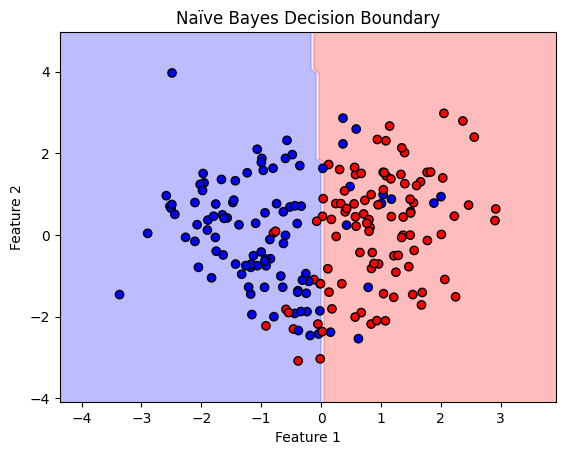

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naïve Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on test set
y_pred = nb.predict(X_test)

# Visualization
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Naïve Bayes Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, nb)
